<a href="https://colab.research.google.com/github/anandam06201/100-MW-pv-solar-power-plant/blob/main/inverter_SMB_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def matrix_form_data(file_path_csv_form):
    df=pd.read_csv(file_path_csv_form)

    matrix=[[j for j in range(32)] for i in range(5)]
    columns=['VOLTAGE','S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','TOTAL','POWER','TEMP']
    m=2

    for i in range(5):
        n=1
        for j in range(32):
            matrix[i][j]= df.iloc[m:m+57,n:n+16].set_axis(columns,axis='columns')
            matrix[i][j]=matrix[i][j].astype(float)


            n=n+16
        m=m+60

    return matrix
def convert_inv_format(matrix_form_data):


    inv_no_date=[[j for j in range(8)] for i in range(20)]
    m=0
    for i in range(5):
        n=0
        for j in range(32):
            inv_no_date[m][n]=matrix_form_data[i][j]
            n=n+1
            if (n==8):
                n=0
                m=m+1




    return inv_no_date
def lineplot_smb_strings1(i,j):
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


    plt.plot(x[i][j]['S1'],label='S1')
    plt.plot(x[i][j]['S2'],label='S2')
    plt.plot(x[i][j]['S3'],label='S3')
    plt.plot(x[i][j]['S4'],label='S4')
    plt.plot(x[i][j]['S5'],label='S5')
    plt.plot(x[i][j]['S6'],label='S6')

    plt.legend()
    plt.grid()

    plt.show()
def lineplot_smb_PTT(i,j):
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


    plt.plot(x[i][j]['POWER'],label='POWER')
    plt.plot(x[i][j]['TOTAL'],label='TOTAL_AMPS')
    plt.plot(x[i][j]['TEMP'],label='TEMPARATURE')
    plt.legend()
    plt.grid()

    plt.show()


def lineplot_smb_voltage(i,j):
    plt.plot(x[i][j]['VOLTAGE'],label='VOLTAGE')
    plt.show()

def lineplot_smb_strings2(i,j):
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


    plt.plot(x[i][j]['S7'],label='S7')
    plt.plot(x[i][j]['S8'],label='S8')
    plt.plot(x[i][j]['S9'],label='S9')
    plt.plot(x[i][j]['S10'],label='S10')
    plt.plot(x[i][j]['S11'],label='S11')
    plt.plot(x[i][j]['S12'],label='S12')
    plt.legend()
    plt.grid()


def lineplot_smb(i,j):
    lineplot_smb_voltage(i,j)
    lineplot_smb_PTT(i,j)
    lineplot_smb_strings1(i,j)
    lineplot_smb_strings2(i,j)

def lineplot_smbtotalamps_avgs(avg_values):

    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)
    plt.plot(avg_values,label='ToTAL_amps_avarages_for_SMB')
    plt.legend()
    plt.grid()

    plt.show()



def avg_values(convert_inv_format):
    avg_values_list=[]
    for i in range(20):
        for j in range(8):


            y=convert_inv_format[i][j]['TOTAL'].tolist()

            add=0
            count=1
            for k in range(len(y)):
                if(y[k]!=0):
                    add=add+y[k]
                    count=count+1

            avg=add/count
            avg_values_list.append(avg)
    return avg_values_list

def below_avg_smb_total_amps(value,avg_values):
    for i in range(len(avg_values)):
        if (avg_values[i]<value):
            print('inverter',i//8,'smb',i-(i//8)*8,'avg_value',avg_values[i])

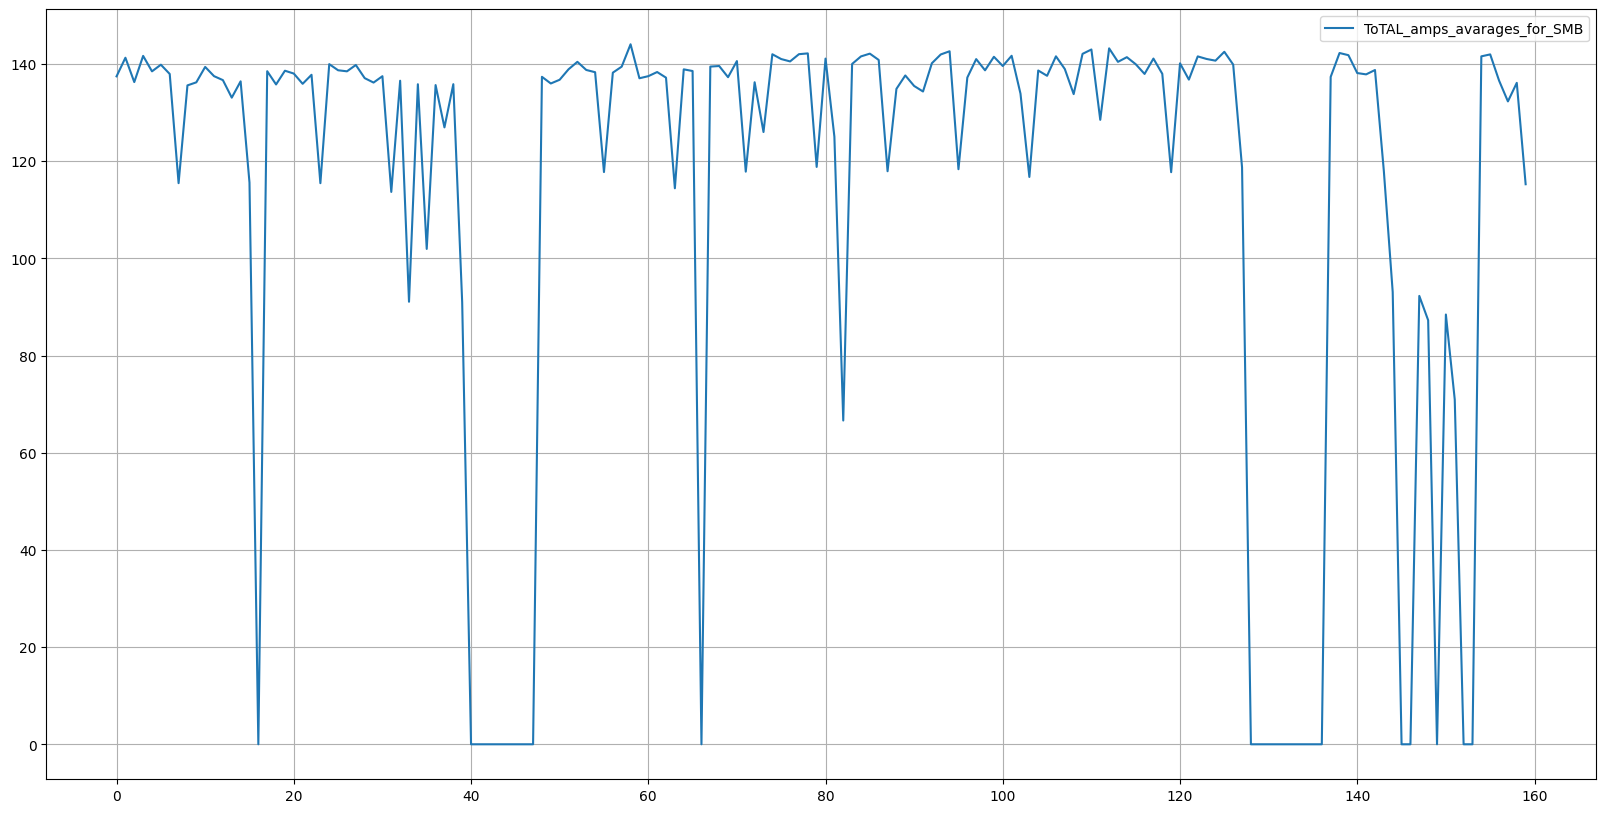

inverter 2 smb 0 avg_value 0.0
inverter 4 smb 1 avg_value 91.07346938775511
inverter 4 smb 3 avg_value 101.94693877551018
inverter 4 smb 7 avg_value 90.99591836734692
inverter 5 smb 0 avg_value 0.0
inverter 5 smb 1 avg_value 0.0
inverter 5 smb 2 avg_value 0.0
inverter 5 smb 3 avg_value 0.0
inverter 5 smb 4 avg_value 0.0
inverter 5 smb 5 avg_value 0.0
inverter 5 smb 6 avg_value 0.0
inverter 5 smb 7 avg_value 0.0
inverter 8 smb 2 avg_value 0.0
inverter 10 smb 2 avg_value 66.63333333333334
inverter 16 smb 0 avg_value 0.0
inverter 16 smb 1 avg_value 0.0
inverter 16 smb 2 avg_value 0.0
inverter 16 smb 3 avg_value 0.0
inverter 16 smb 4 avg_value 0.0
inverter 16 smb 5 avg_value 0.0
inverter 16 smb 6 avg_value 0.0
inverter 16 smb 7 avg_value 0.0
inverter 17 smb 0 avg_value 0.0
inverter 18 smb 0 avg_value 93.06724137931025
inverter 18 smb 1 avg_value 0.0
inverter 18 smb 2 avg_value 0.0
inverter 18 smb 3 avg_value 92.28103448275857
inverter 18 smb 4 avg_value 87.26896551724147
inverter 18 smb 5 

In [ ]:
path='SMB REPORT BLOCK (1-5)_23 04 2024_20 54 58.csv'
a=matrix_form_data(path)
x=convert_inv_format(a)
b=avg_values(x)
lineplot_smbtotalamps_avgs(b)
below_avg_smb_total_amps(110,b)

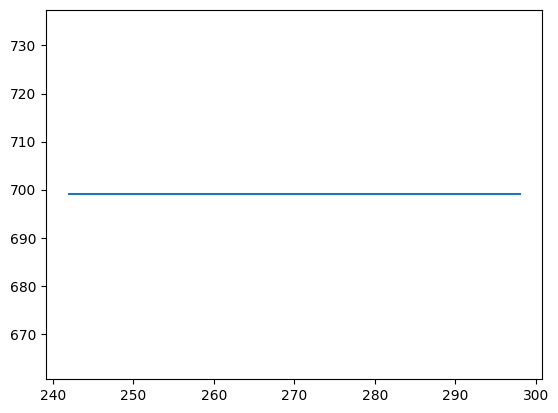

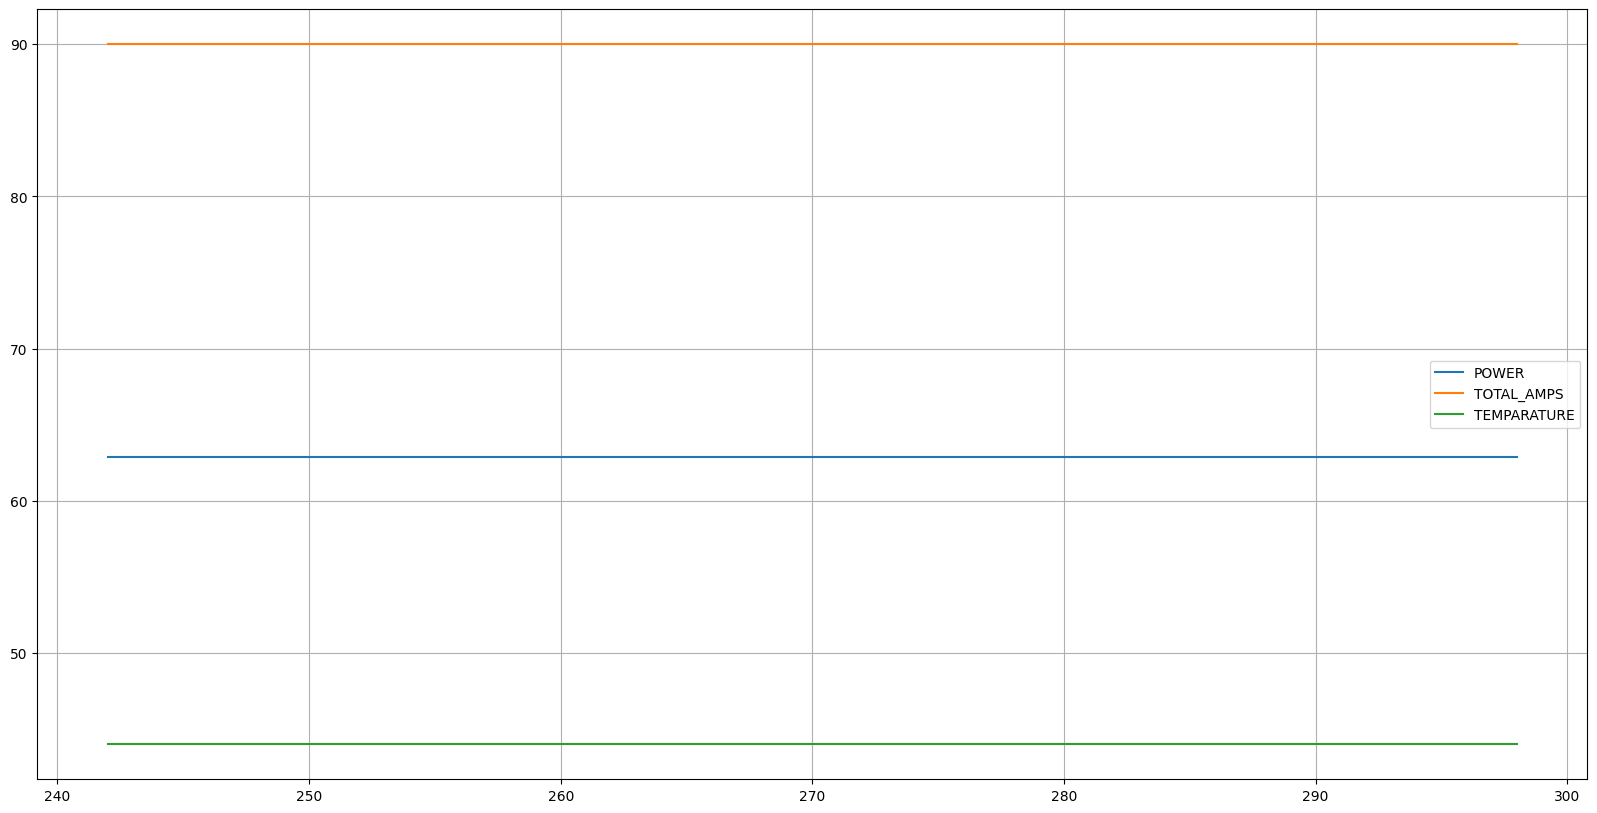

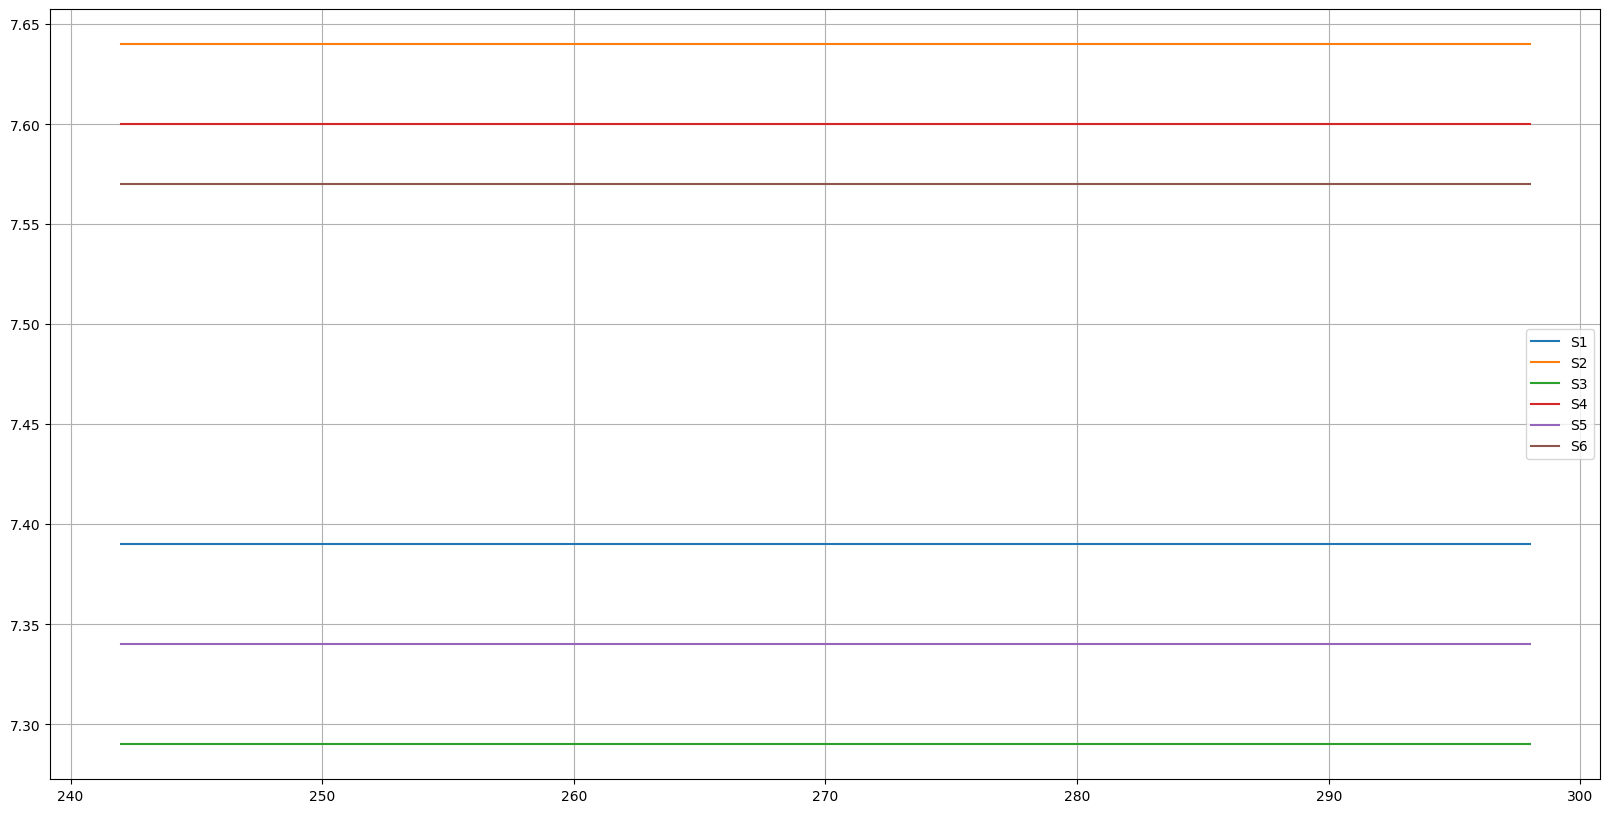

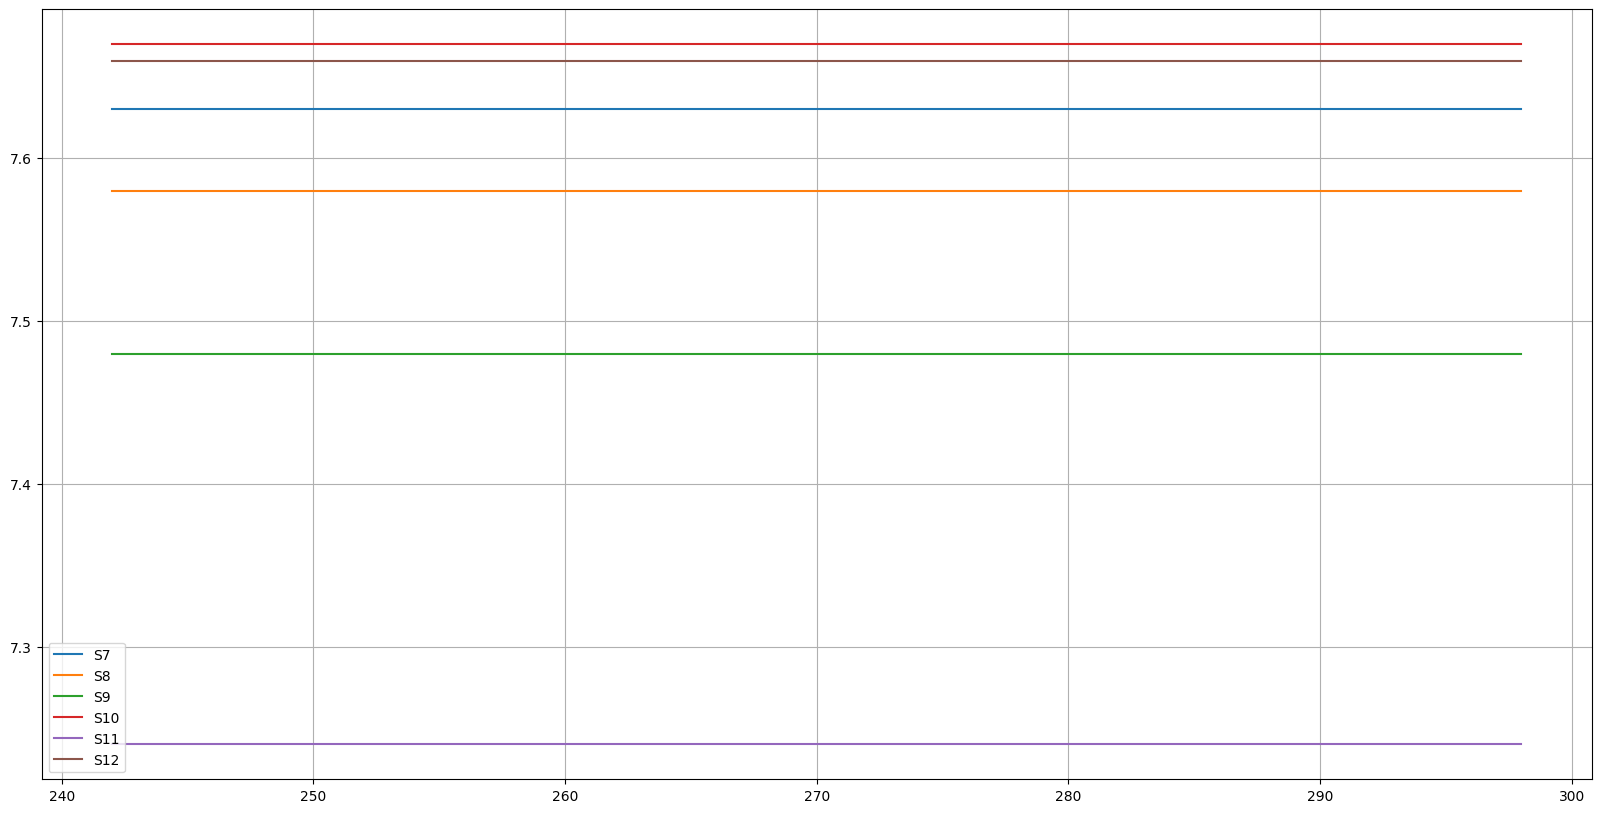

In [ ]:
lineplot_smb(18,6)

In [ ]:
x[18][6]

,VOLTAGE,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,TOTAL,POWER,TEMP
242,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
243,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
244,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
245,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
246,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
247,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
248,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
249,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
250,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
251,699.0,7.39,7.64,7.29,7.6,7.34,7.57,7.63,7.58,7.48,7.67,7.24,7.66,90.0,62.91,44.0
